HPA_KF
24.170000305175783
24.170000305175783
24.170000305175783
24.170000305175783
24.170000305175783
24.170000305175783
24.170000305175783
24.170000305175783
24.16000030517578
24.15000030517578
24.140000305175782
24.13000030517578
24.13000030517578
24.120000305175783
24.100000305175783
24.100000305175783
24.09000030517578
24.070000305175782
24.070000305175782
24.050000305175782
24.050000305175782
24.04000030517578
24.030000305175783
24.02000030517578
24.02000030517578
24.02000030517578
23.990000305175784
23.990000305175784
23.97000030517578
23.97000030517578
23.97000030517578
23.95000030517578
23.91000030517578
23.91000030517578
23.890000305175782
23.890000305175782
23.86000030517578
23.780000305175783
23.77000030517578
23.77000030517578
23.710000305175782
23.61000030517578
23.440000305175783
23.22000030517578
23.170000305175783
22.95000030517578
22.91000030517578
22.850000305175783
22.800000305175782
22.75000030517578
22.570000305175782
22.530000305175783
22.52000030517578
22.4600003

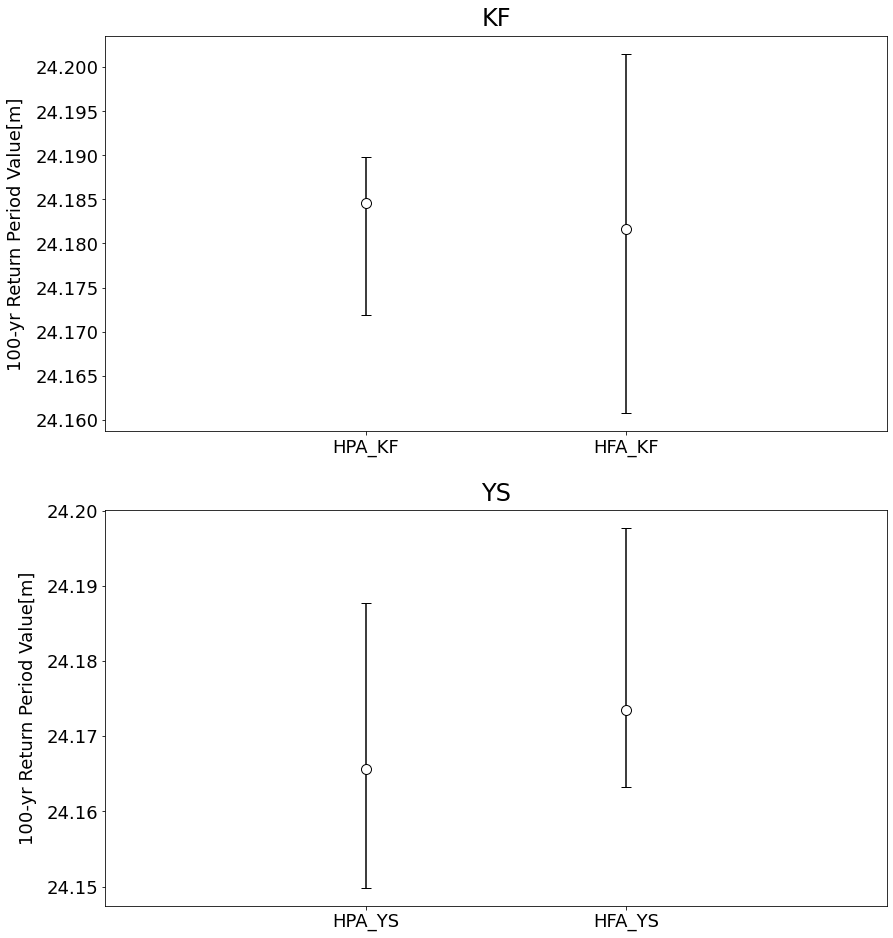

In [8]:
"""
それぞれのモデルのイベントごとの空間最大値を算出する.
それらの上位50個の点に対して,　極値統計解析を行い, 現在と過去で比較する
"""

from csv import reader
import matplotlib.pyplot as plt
import numpy as np
import func

fig = plt.figure(figsize=(14, 16))

MODEL = ['KF', 'YS']
DATA_CNT = 100

for model_num in range(len(MODEL)):
    for num in range(2):
        model = MODEL[model_num]
        if num == 0:
            model = 'HPA_' + model
        else:
            model = 'HFA_' + model + '_c0'
        
        print(model)

        with open('../pot_csv/' + model + '_POT_DATA.csv', 'r') as csv_file:
            csv_reader = reader(csv_file)
            POT = list(csv_reader)
        with open('../pot_csv/' + model + '_POT_INDEX.csv', 'r') as csv_file:
            csv_reader = reader(csv_file)
            POT_INDEX = list(csv_reader)

        DATA = []  # [Hsのindex, Hs]の配列
        for i in range(len(POT)):
            for j in range(len(POT[i])):
                DATA.append([int(POT_INDEX[i][j]), float(POT[i][j])])
        
        # [Hsのindexがsortされる(小さい順)]
        DATA.sort()

        last_index = 0
        max_val = 0

        EVENT_POT = [[]]  # イベントごとのPOTを収納
        for data in DATA:
            # if data[1] == 24.170000305175783:  #この値は欠損地扱い
            #     continue
            if data[0] > last_index + 24 * 7:
                EVENT_POT.append([data[0], data[1]])
                last_index = data[0]
                max_val = data[1]
            else:
                if data[1] > max_val:
                    EVENT_POT[-1] = [data[0], data[1]]
                    last_index = data[0]
                    max_val = data[1]

        POT_DATA = []  # 空間最大波高
        for pot in EVENT_POT:
            POT_DATA.append(pot[1])
        
        # 大きい順にsort
        POT_DATA.sort(reverse=True)
        for pot in POT_DATA[:300]:
            print(pot)
        POT_DATA = POT_DATA[:DATA_CNT]
        print('POTデータの範囲', POT_DATA[-1], '~', POT_DATA[0])
        # count = {}
        # for pot in POT_DATA:
        #     count.setdefault(pot, 0)
        #     count[pot] +=1
        # cnt = 0
        # for key, value in count.items():
        #     cnt += 1
        #     print('{}: {}'.format(key, value))
        
        if num == 0:
            RV_ = func.lwm_gpd(data=POT_DATA, error=[0.005], thr=POT_DATA[-1], n=219143, n0=DATA_CNT, con=0.95)
            print('RV：', RV_)
        else:
            RV_0 = func.lwm_gpd(data=POT_DATA, error=[0.005], thr=POT_DATA[-1], n=219143, n0=DATA_CNT, con=0.95)
            print('RV：', RV_0)


    # 描画
    ax = fig.add_subplot(2, 1, model_num + 1)
    a = plt.errorbar(
        x=[1, 2],
        y=[RV_[1], RV_0[1]],
        yerr=np.array(
            [
                [RV_[1] - RV_[0], RV_0[1] - RV_0[0]],
                [RV_[2] - RV_[1], RV_0[2] - RV_0[1]]
            ]
        ),
        capsize=5,
        fmt='o',
        markersize=10,
        ecolor='black',
        markeredgecolor='black',
        color='w'
    )
    ax.set_xlim((0, 3))
    ax.set_title(model[4:6], fontsize=24, pad=10)
    ax.set_xticks([1, 2], ['HPA_' + model[4:6], 'HFA_' + model[4:6]], fontsize=18)
    ax.set_ylabel('100-yr Return Period Value[m]', fontsize=18, labelpad=10)
    ax.tick_params(axis='y', labelsize=18)

plt.savefig("../img/rv_of_tc.png")
plt.show()